In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from AutoClass import AutoClassImpute
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
expr = pd.read_csv('C:/Users/hli45/Desktop/auto_code/sim_sensitivity_bottleneckSize/counts.csv',index_col=0)
expr_true = pd.read_csv('C:/Users/hli45/Desktop/auto_code/sim_sensitivity_bottleneckSize/truecounts.csv',index_col=0)
cellinfo = pd.read_csv('C:/Users/hli45/Desktop/auto_code/sim_sensitivity_bottleneckSize/cellinfo.csv',index_col=0)

In [3]:
X = expr.values #Splash generated scRNA-seq data with dropout
X_true = expr_true.values #Splash generated scRNA-seq data without dropout (ground truth)
Y = cellinfo['Group'].values #cell type label
unique_class = np.unique(Y)
K = len(unique_class)

In [4]:
def normalization(data):
    data = data.astype('float32')
    libs = data.sum(axis=1)
    norm_factor = np.diag(np.median(libs)/libs)
    data = np.dot(norm_factor,data)
    data = np.log2(data + 1.)
    return data

In [5]:
X_norm = normalization(X)
X_true_norm = normalization(X_true)

In [20]:
PCA_raw = PCA(n_components=50).fit_transform(X_norm)
tsne_raw = TSNE(n_components=2).fit_transform(PCA_raw)
PCA_true = PCA(n_components=50).fit_transform(X_true_norm)
tsne_true = TSNE(n_components=2).fit_transform(PCA_true)

Text(0.5, 1.0, 'With Dropout')

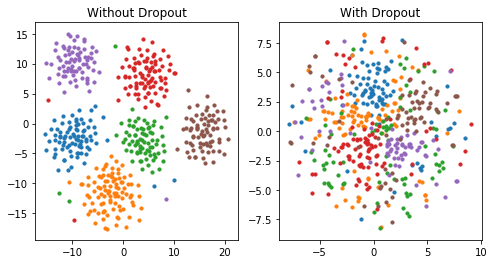

In [7]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(121)
for i in range(K):
    plt.scatter(tsne_true[Y==unique_class[i],0],
                tsne_true[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Without Dropout')
    
fig.add_subplot(122)
for i in range(K):
    plt.scatter(tsne_raw[Y==unique_class[i],0],
                tsne_raw[Y==unique_class[i],1], 
                s=10,label = unique_class[i] )
plt.title('With Dropout')

#### imputation by AutoClass

In [8]:
imp, auto = AutoClassImpute(X,num_cluster=[4,5,6]) 

500 cells and 973 genes
n_cluster = 4
n_cluster = 5
n_cluster = 6
escape time is: 102.69864249229431


In [9]:
PCA_imp = PCA(n_components=50).fit_transform(imp)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

Text(0, 0.5, 'tSNE2')

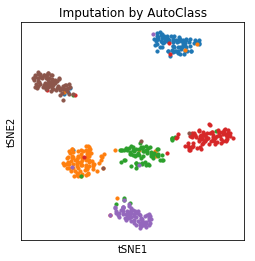

In [10]:
fig = plt.figure(figsize=(4,4))
for i in range(K):
    plt.scatter(tsne_imp[Y==unique_class[i],0],
                tsne_imp[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by AutoClass')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

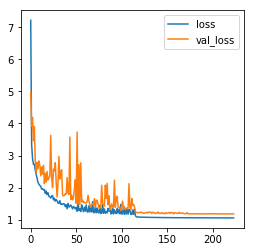

In [13]:
fig = plt.figure(figsize=(4,4))

plt.plot(auto[2].his.history['loss'],label='loss')
plt.plot(auto[2].his.history['val_loss'],label='val_loss')
plt.legend()

#### Imputation by an autoencoder (without classifier branch)

In [14]:
imp_autoencoer, auto = AutoClassImpute(X,classifier_weight=0) 

500 cells and 973 genes
no classifier layer
escape time is: 37.61751890182495


In [15]:
PCA_autoencoder = PCA(n_components=50).fit_transform(imp_autoencoer)
tsne_autoencoder = TSNE(n_components=2).fit_transform(PCA_autoencoder)

Text(0, 0.5, 'tSNE2')

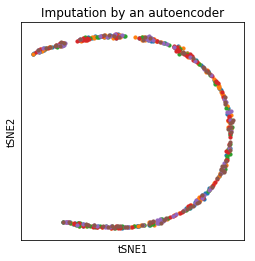

In [16]:
fig = plt.figure(figsize=(4,4))
for i in range(K):
    plt.scatter(tsne_autoencoder[Y==unique_class[i],0],
                tsne_autoencoder[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by an autoencoder')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

### different number of clusters

In [6]:
nn = [4,5,6,7,8]
imps = []
for n in nn:
    imp, auto = AutoClassImpute(X,num_cluster=[n-2,n-1,n,n+1,n+2]) 
    imps.append(imp)

500 cells and 973 genes
n_cluster = 2
n_cluster = 3
n_cluster = 4
n_cluster = 5
n_cluster = 6
escape time is: 153.7538800239563
500 cells and 973 genes
n_cluster = 3
n_cluster = 4
n_cluster = 5
n_cluster = 6
n_cluster = 7
escape time is: 128.85416984558105
500 cells and 973 genes
n_cluster = 4
n_cluster = 5
n_cluster = 6
n_cluster = 7
n_cluster = 8
escape time is: 143.2804250717163
500 cells and 973 genes
n_cluster = 5
n_cluster = 6
n_cluster = 7
n_cluster = 8
n_cluster = 9
escape time is: 151.33342266082764
500 cells and 973 genes
n_cluster = 6
n_cluster = 7
n_cluster = 8
n_cluster = 9
n_cluster = 10
escape time is: 171.37665438652039


In [7]:
tsnes = []
for i in range(5):
    PCA_autoencoder = PCA(n_components=50).fit_transform(imps[i])
    tsnes.append(TSNE(n_components=2).fit_transform(PCA_autoencoder))
    

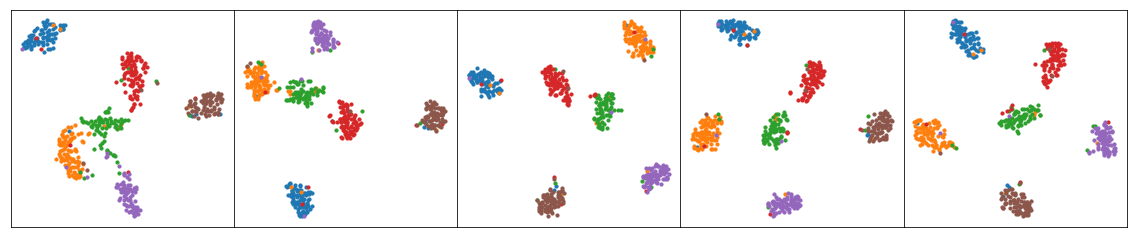

In [37]:
fig = plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=0)
for ii in range(5):
    fig.add_subplot(150+ii+1)

    for i in range(K):
        plt.scatter(tsnes[ii][Y==unique_class[i],0],
                    tsnes[ii][Y==unique_class[i],1], 
                    s=10,label = unique_class[i] ) 

    plt.xticks([],[])
    plt.yticks([],[])
plt.savefig('sensitivity_K_tsne_data1.pdf')

In [11]:
mse = []
mse.append(np.mean((X_norm-X_true_norm)**2))
for i in range(len(nn)):
    mse.append(np.mean((imps[i]-X_true_norm)**2))

In [12]:
mse

[1.5486724,
 0.8400862701547313,
 0.8392014345323159,
 0.839558387549785,
 0.8407307260818364,
 0.8401325809289856]

In [14]:
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
aris_auto = []
asws_auto = []

for i in range(len(nn)):

    
    kmeans = KMeans(n_clusters = K,random_state=1).fit(StandardScaler().fit_transform(tsnes[i]))
    cluster_label = kmeans.labels_
    aris_auto.append(adjusted_rand_score(Y,cluster_label))
    asws_auto.append(silhouette_score(tsnes[i],Y))
    
    

In [18]:
aris_auto

[0.8171049636843918,
 0.8346041457025191,
 0.8422721203255149,
 0.8511701097974778,
 0.8472061428851704]

In [19]:
asws_auto

[0.52944535, 0.5693717, 0.624284, 0.6239609, 0.6282441]

In [23]:
kmeans = KMeans(n_clusters = K,random_state=1).fit(StandardScaler().fit_transform(tsne_raw))
cluster_label = kmeans.labels_
ari_raw = adjusted_rand_score(Y,cluster_label)
asw_raw = silhouette_score(tsne_raw,Y)
kmeans = KMeans(n_clusters = K,random_state=1).fit(StandardScaler().fit_transform(tsne_true))
cluster_label = kmeans.labels_
ari_true = adjusted_rand_score(Y,cluster_label)
asw_true = silhouette_score(tsne_true,Y)
print(ari_raw,asw_raw,ari_true,asw_true)

0.11928410786013455 -0.012414671 0.9901492203071083 0.6067765


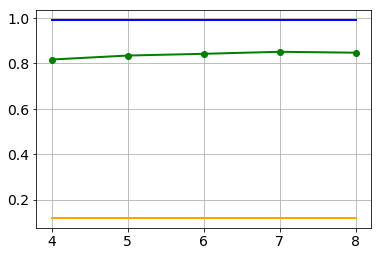

In [38]:
size = [0,1,2,3,4]
fig, ax = plt.subplots()
ax.plot(size,[ari_true]*5,label='True',lw=2,color='blue')
ax.plot(size,[ari_raw]*5,label='raw',lw=2,color='orange')
ax.plot(size,aris_auto,
        marker='o',label='AutoClass',lw=2,color='green')

ax.grid(True)
ax.set_xticks([0,1,2,3,4])
positions = (0,1,2,3,4)
labels = nn
plt.xticks(positions, labels,fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('sensitivity_K_ari_data1.pdf')

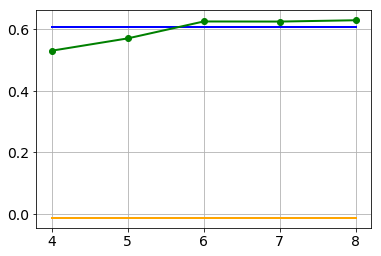

In [39]:
size = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.plot(size,[asw_true]*5,label='True',lw=2,color='blue')
ax.plot(size,[asw_raw]*5,label='raw',lw=2,color='orange')
ax.plot(size,asws_auto,
        marker='o',label='AutoClass',lw=2,color='green')

ax.grid(True)
ax.set_xticks([0,1,2,3,4])
positions = (0,1,2,3,4)
labels = nn
plt.xticks(positions, labels,fontsize=14)
plt.yticks([0.0,0.2,0.4,0.6],[0.0,0.2,0.4,0.6],fontsize=14)

plt.savefig('sensitivity_K_asw_data1.pdf')

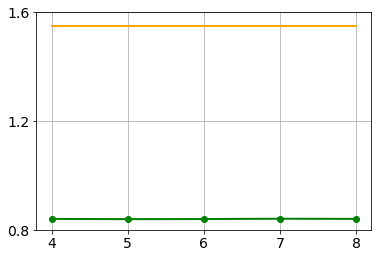

In [42]:
size = [0,1,2,3,4]



fig, ax = plt.subplots()

ax.plot(size,[mse[0]]*5,label='raw',lw=2,color='orange')
ax.plot(size,mse[1:],
        marker='o',label='AutoClass',lw=2,color='green')

ax.grid(True)
ax.set_xticks([0,1,2,3,4])
positions = (0,1,2,3,4)
labels = nn
plt.xticks(positions, labels,fontsize=14)
plt.yticks([0.8,1.2,1.6],[0.8,1.2,1.6],fontsize=14)

plt.savefig('sensitivity_K_mse_data1.pdf')

In [7]:
ratio = []
for i in range(len(nn)):
    ratio.append(np.mean(imps[i][(X==0)&(X_true!=0)])/np.mean(imps[i][(X==0)&(X_true==0)]))

In [8]:
ratio

[5.952627785779298,
 5.9622405384895565,
 5.969178976445084,
 5.957659184445927,
 5.984518787512818]

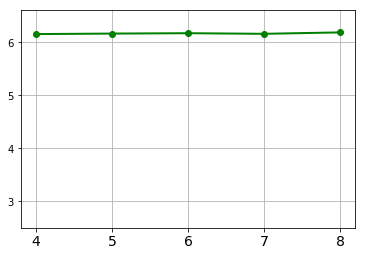

In [12]:
size = [0,1,2,3,4]

fig, ax = plt.subplots()


ax.plot(size,np.array(ratio)+0.2,
        marker='o',label='AutoClass',lw=2,color='green')

ax.grid(True)
ax.set_xticks([0,1,2,3,4])
positions = (0,1,2,3,4)
labels = nn
plt.ylim([2.5,6.6])
plt.xticks(positions, labels,fontsize=14)
plt.yticks([3,4,5,6],[3,4,5,6])
plt.savefig('sensitivity_K_ratio_data1_7-14.pdf')